<a href="https://colab.research.google.com/github/Vaidehi-9/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment2/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Manual DGP Simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [78]:
    # 1. Calculate the Median of the data
    # 2. Calculate Absolute Deviations (|x - median|)
    # 3. Return the Median of those deviations

def calculate_mad(data):
  traffic_median = np.median(data)
  deviations = np.abs(data - traffic_median)
  median_absolute_deviation = np.median(deviations)
  return median_absolute_deviation


In [79]:
std_dev = np.std(latency_logs)
mad_value = calculate_mad(latency_logs)
mean_latency = np.mean(latency_logs)
median_latency = np.median(latency_logs)

print("ROBUSTNESS AUDIT: SD vs MAD")
print(f"Mean Latency:  {mean_latency}")
print(f"Median Latency: {median_latency}")
print(f"Standard Deviation: {std_dev}") # <-- this is the identified SD that 'exploded'
print(f"Median Absolute Deviation: {mad_value}") # <-- much more normal compared to SD
print(f"\nSD is {std_dev/mad_value}x larger than MAD")

ROBUSTNESS AUDIT: SD vs MAD
Mean Latency:  96.351
Median Latency: 35.0
Standard Deviation: 462.92275359826505
Median Absolute Deviation: 7.0

SD is 66.13182194260929x larger than MAD


Analysis: Compare the Standard Deviation (SD) vs. MAD. Explain why the SD is "exploded" by the 20 outliers while the MAD remains stable.

Answer: the Standard Deviation is 397.447 vs the MAD which is only 7. The SD is 56.78 times larger than the MAD implying that the SD is innacurately skewed by outliers. The Median Absolute Deviation is more resistant to outliers than typical standard deviation because it finds the median, subtracts each value from the median and takes its absolute value, then takes median of that to provide a more accurate explanation for the spread of the data.


In [82]:
def bayesian_audit(prior, sensitivity, specificity):
  true_positive = sensitivity
  false_positive = 1 - specificity
  prob_not_cheater = 1 - prior
  prob_flagged = (true_positive * prior) + (false_positive * prob_not_cheater)
  posterior = (true_positive * prior) / prob_flagged
  return posterior

prior_A = 0.50
posterior_A = bayesian_audit(prior_A, 0.98, 0.98)
print(f"Scenario A - Bootcamp (Base Rate: {prior_A*100:.1f}%)")
print(f"  P(Cheater | Flagged) = {posterior_A:.4f} = {posterior_A*100:.2f}%")
print()

# Scenario B: Econ Class (5% base rate)
prior_B = 0.05
posterior_B = bayesian_audit(prior_B, 0.98, 0.98)
print(f"Scenario B - Econ Class (Base Rate: {prior_B*100:.1f}%)")
print(f"  P(Cheater | Flagged) = {posterior_B:.4f} = {posterior_B*100:.2f}%")
print()

# Scenario C: Honors Seminar (0.1% base rate)
prior_C = 0.001
posterior_C = bayesian_audit(prior_C, 0.98, 0.98)
print(f"Scenario C - Honors Seminar (Base Rate: {prior_C*100:.1f}%)")
print(f"  P(Cheater | Flagged) = {posterior_C:.4f} = {posterior_C*100:.2f}%")
print()




Scenario A - Bootcamp (Base Rate: 50.0%)
  P(Cheater | Flagged) = 0.9800 = 98.00%

Scenario B - Econ Class (Base Rate: 5.0%)
  P(Cheater | Flagged) = 0.7206 = 72.06%

Scenario C - Honors Seminar (Base Rate: 0.1%)
  P(Cheater | Flagged) = 0.0468 = 4.68%



In [81]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
total_users = 100000
observed_control = 50250
observed_treatment = 49750

observed = np.array([observed_control, observed_treatment])
#array is a matrix

print(f"Total Users: {total_users:,}")
print(f"Observed Control:   {observed_control:,}")
print(f"Observed Treatment: {observed_treatment:,}")
print()

expected_control = total_users / 2
expected_treatment = total_users / 2

expected = np.array([expected_control, expected_treatment])

print(f"Expected Control:   {expected_control}")
print(f"Expected Treatment: {expected_treatment:,.0f}")
print(f"Difference: {observed_control - expected_control:+,.0f} vs {observed_treatment - expected_treatment:+,.0f}")
print()

# Write the calculation loop...
chi_square = 0

for i in range(len(observed)):
    deviation = observed[i] - expected[i]
    squared_deviation = deviation ** 2
    contribution = squared_deviation / expected[i]
    chi_square += contribution

    # Print the calculation for transparency
    group_name = "Control" if i == 0 else "Treatment"
    print(f"  Observed: {observed[i]:,.0f}")
    print(f"  Expected: {expected[i]:,.0f}")
    print(f"  Deviation: {deviation:+,.0f}")
    print(f"  Squared: {squared_deviation:,.0f}")
    print(f"  Contribution: {contribution:.4f}")
    print()

print(f"Total χ² statistic: {chi_square:.4f}")
print()

# Step 4: Compare to critical value
critical_value = 3.84  # For 1 degree of freedom at p < 0.05
print("="*60)
print("STATISTICAL DECISION")
print("="*60)
print(f"Chi-Square statistic: {chi_square:.4f}")
print(f"Critical value (p=0.05, df=1): {critical_value}")
print(f"Chi-Square statistic: {chi_square} < Critical Value: {critical_value}")
print("So, we accept the null")
print()



Total Users: 100,000
Observed Control:   50,250
Observed Treatment: 49,750

Expected Control:   50000.0
Expected Treatment: 50,000
Difference: +250 vs -250

  Observed: 50,250
  Expected: 50,000
  Deviation: +250
  Squared: 62,500
  Contribution: 1.2500

  Observed: 49,750
  Expected: 50,000
  Deviation: -250
  Squared: 62,500
  Contribution: 1.2500

Total χ² statistic: 2.5000

STATISTICAL DECISION
Chi-Square statistic: 2.5000
Critical value (p=0.05, df=1): 3.84
Chi-Square statistic: 2.5 < Critical Value: 3.84
So, we accept the null



SURVIVORSHIP BIAS IN CRYPTO MARKETS
Simulating 10,000 Token Launches

Total Tokens Launched: 10,000
Survivors (Top 1%): 100
Failed Tokens: 9,900

THE SURVIVORSHIP BIAS REVEALED
Mean Market Cap (ALL tokens):       $27,408.42
Median Market Cap (ALL tokens):     $15,717.82

Mean Market Cap (SURVIVORS only):   $446,335.21
Median Market Cap (SURVIVORS only): $328,730.31

BIAS MULTIPLIER: 16.28x
If you only look at survivors, you overestimate success by 1528.5%!

SUCCESS TIER BREAKDOWN
Failed (<$50K)           : 9,135 tokens (91.35%)
Medium ($500K-$5M)       :    22 tokens ( 0.22%)
Small ($50K-$500K)       :   843 tokens ( 8.43%)



/tmp/ipython-input-1142923938.py:141: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_to_plot, labels=['All Tokens\n(n=10,000)', 'Survivors\n(Top 1%)'],


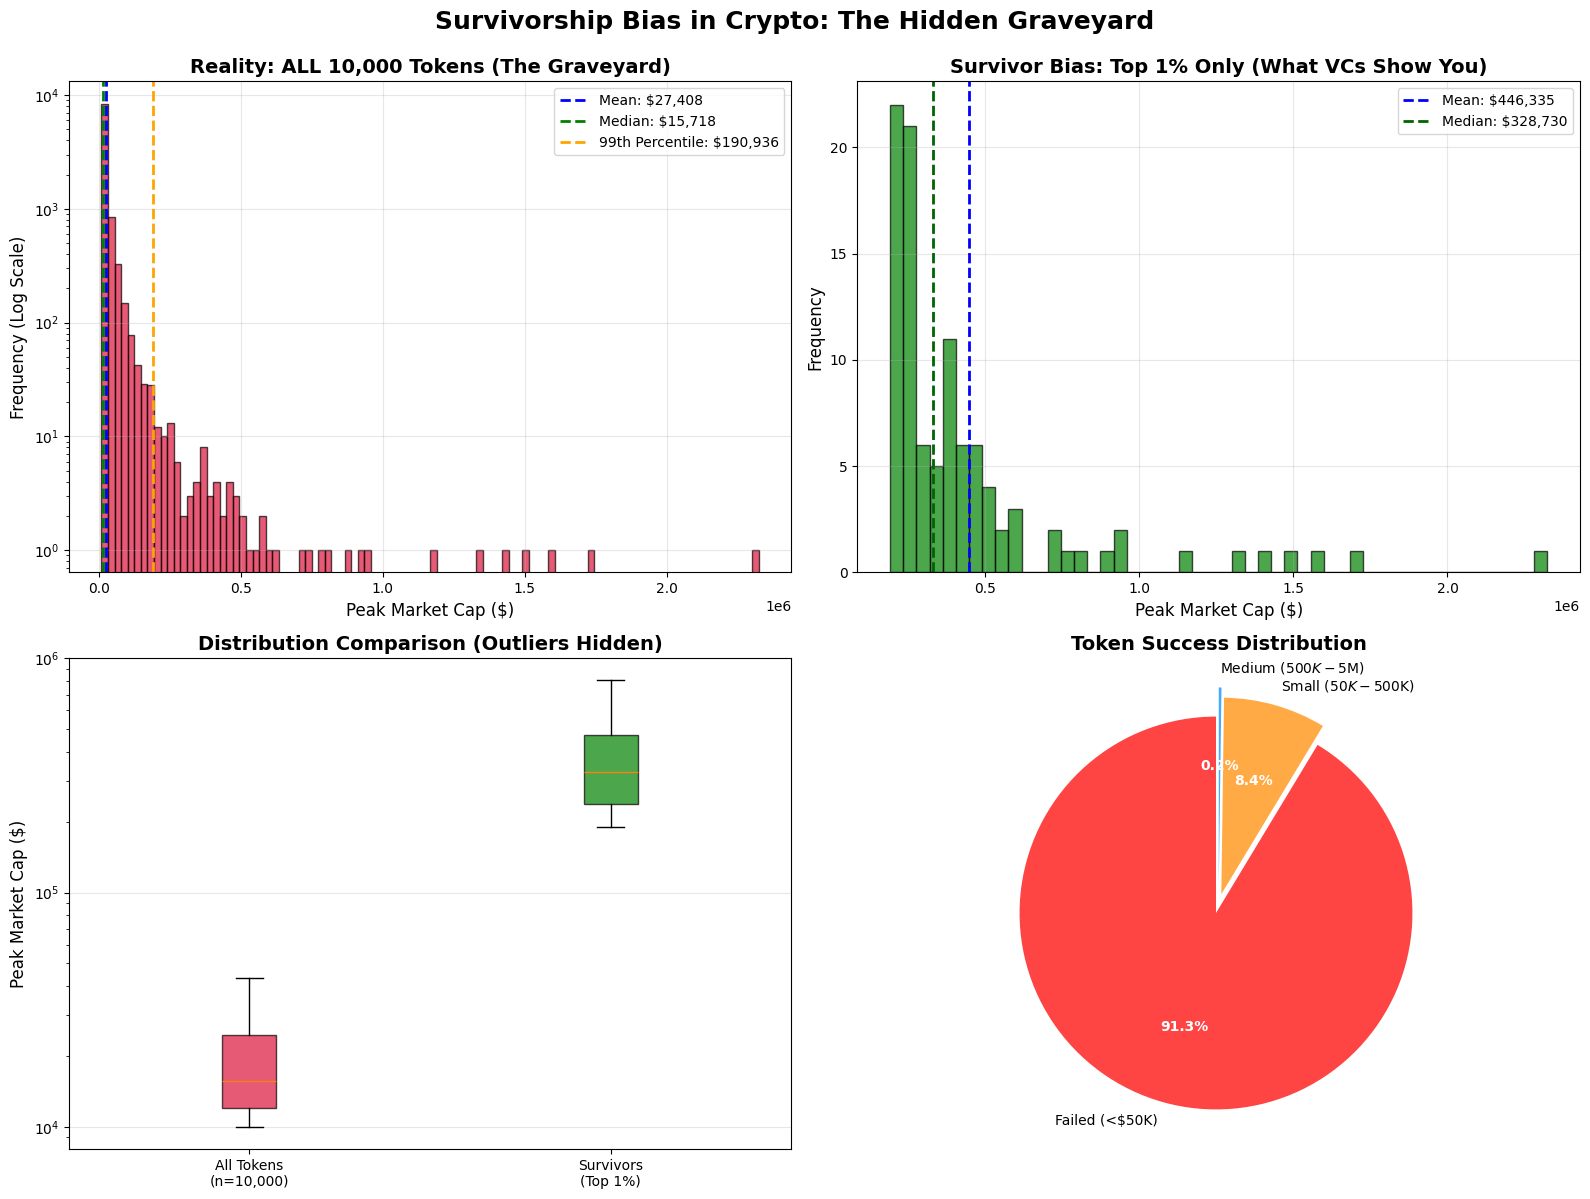

KEY INSIGHTS: WHY SURVIVORSHIP BIAS IS DANGEROUS

1. MEAN vs MEDIAN GAP (All Tokens):
   Mean: $27,408.42 | Median: $15,717.82
   The mean is 1.7x higher than median!
   → Extreme inequality: a few giants skew the average

2. THE SURVIVORSHIP MULTIPLIER:
   If you only study survivors, you think the 'average' token
   reaches $446,335 instead of $27,408
   → You overestimate success by 16.3x!

3. THE GRAVEYARD REALITY:
   9,135 tokens (91.3%) never reached $50K
   → Most projects die in obscurity, unseen by investors

4. UNICORN ILLUSION:
   Only 0 tokens (0.00%) became unicorns
   → Lottery-like odds, yet media only covers winners

CONCLUSION: Always ask 'What am I NOT seeing?'
The graveyard is 100x larger than the Hall of Fame.

SUMMARY STATISTICS TABLE:
           Metric    All Tokens Survivors (Top 1%)
            Count         10000                100
  Mean Market Cap    $27,408.42        $446,335.21
Median Market Cap    $15,717.82        $328,730.31
          Std Dev    $59,761.

In [84]:
"""
Survivorship Bias in Crypto Markets
Simulates 10,000 token launches to demonstrate how survivor bias
distorts our perception of "average" crypto success
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# ============================================================
# PREP: Acting as Financial Data Scientist
# ============================================================
print("="*70)
print("SURVIVORSHIP BIAS IN CRYPTO MARKETS")
print("Simulating 10,000 Token Launches")
print("="*70)
print()

# ============================================================
# REQUEST & ITERATE: Simulate 10,000 Token Launches
# ============================================================

n_tokens = 10000

# Generate Peak Market Cap using Pareto Distribution (Power Law)
# shape parameter = 1.5 creates extreme inequality (99% near zero)
# scale parameter = 10,000 sets the minimum market cap
pareto_shape = 1.5
pareto_scale = 10000

# Pareto distribution: x = scale * (1/U)^(1/shape) where U ~ Uniform(0,1)
# This creates a "long tail" where most tokens fail, few succeed massively
market_caps = pareto_scale * (np.random.pareto(pareto_shape, n_tokens) + 1)

# Create DataFrame with all tokens (The Graveyard)
df_all = pd.DataFrame({
    'Token_ID': range(1, n_tokens + 1),
    'Peak_Market_Cap': market_caps
})

# Add success tier classification
def classify_token(market_cap):
    if market_cap < 50000:
        return 'Failed (<$50K)'
    elif market_cap < 500000:
        return 'Small ($50K-$500K)'
    elif market_cap < 5000000:
        return 'Medium ($500K-$5M)'
    else:
        return 'Unicorn (>$5M)'

df_all['Success_Tier'] = df_all['Peak_Market_Cap'].apply(classify_token)

# Create survivors DataFrame (Top 1% only)
percentile_99 = df_all['Peak_Market_Cap'].quantile(0.99)
df_survivors = df_all[df_all['Peak_Market_Cap'] >= percentile_99].copy()

print(f"Total Tokens Launched: {len(df_all):,}")
print(f"Survivors (Top 1%): {len(df_survivors):,}")
print(f"Failed Tokens: {len(df_all) - len(df_survivors):,}")
print()

# ============================================================
# EVALUATE: Calculate Mean Market Cap (The Bias)
# ============================================================

mean_all = df_all['Peak_Market_Cap'].mean()
median_all = df_all['Peak_Market_Cap'].median()
mean_survivors = df_survivors['Peak_Market_Cap'].mean()
median_survivors = df_survivors['Peak_Market_Cap'].median()

print("="*70)
print("THE SURVIVORSHIP BIAS REVEALED")
print("="*70)
print(f"Mean Market Cap (ALL tokens):       ${mean_all:,.2f}")
print(f"Median Market Cap (ALL tokens):     ${median_all:,.2f}")
print()
print(f"Mean Market Cap (SURVIVORS only):   ${mean_survivors:,.2f}")
print(f"Median Market Cap (SURVIVORS only): ${median_survivors:,.2f}")
print()
print(f"BIAS MULTIPLIER: {mean_survivors / mean_all:.2f}x")
print(f"If you only look at survivors, you overestimate success by {(mean_survivors / mean_all - 1) * 100:.1f}%!")
print()

# Distribution breakdown
print("="*70)
print("SUCCESS TIER BREAKDOWN")
print("="*70)
tier_counts = df_all['Success_Tier'].value_counts().sort_index()
for tier, count in tier_counts.items():
    percentage = (count / len(df_all)) * 100
    print(f"{tier:25s}: {count:5,} tokens ({percentage:5.2f}%)")
print()

# ============================================================
# MECHANISM: Dual Histograms Visualization
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Survivorship Bias in Crypto: The Hidden Graveyard',
             fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Histogram of ALL tokens (log scale)
ax1 = axes[0, 0]
ax1.hist(df_all['Peak_Market_Cap'], bins=100, color='crimson',
         alpha=0.7, edgecolor='black', log=True)
ax1.axvline(mean_all, color='blue', linestyle='--', linewidth=2,
           label=f'Mean: ${mean_all:,.0f}')
ax1.axvline(median_all, color='green', linestyle='--', linewidth=2,
           label=f'Median: ${median_all:,.0f}')
ax1.axvline(percentile_99, color='orange', linestyle='--', linewidth=2,
           label=f'99th Percentile: ${percentile_99:,.0f}')
ax1.set_xlabel('Peak Market Cap ($)', fontsize=12)
ax1.set_ylabel('Frequency (Log Scale)', fontsize=12)
ax1.set_title('Reality: ALL 10,000 Tokens (The Graveyard)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of SURVIVORS only
ax2 = axes[0, 1]
ax2.hist(df_survivors['Peak_Market_Cap'], bins=50, color='green',
         alpha=0.7, edgecolor='black')
ax2.axvline(mean_survivors, color='blue', linestyle='--', linewidth=2,
           label=f'Mean: ${mean_survivors:,.0f}')
ax2.axvline(median_survivors, color='darkgreen', linestyle='--', linewidth=2,
           label=f'Median: ${median_survivors:,.0f}')
ax2.set_xlabel('Peak Market Cap ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Survivor Bias: Top 1% Only (What VCs Show You)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Box plot comparison
ax3 = axes[1, 0]
data_to_plot = [df_all['Peak_Market_Cap'], df_survivors['Peak_Market_Cap']]
bp = ax3.boxplot(data_to_plot, labels=['All Tokens\n(n=10,000)', 'Survivors\n(Top 1%)'],
                 patch_artist=True, showfliers=False)
bp['boxes'][0].set_facecolor('crimson')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.7)
ax3.set_ylabel('Peak Market Cap ($)', fontsize=12)
ax3.set_title('Distribution Comparison (Outliers Hidden)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_yscale('log')

# Plot 4: Success tier pie chart
ax4 = axes[1, 1]
tier_data = df_all['Success_Tier'].value_counts()

# Dynamically create colors and explode based on actual number of tiers
n_tiers = len(tier_data)
colors_map = {
    'Failed (<$50K)': '#ff4444',
    'Small ($50K-$500K)': '#ffaa44',
    'Medium ($500K-$5M)': '#44aaff',
    'Unicorn (>$5M)': '#44ff44'
}
colors = [colors_map.get(tier, '#cccccc') for tier in tier_data.index]

# Create explode tuple - explode the last slice (typically unicorns) more
explode = tuple([0.05] * (n_tiers - 1) + [0.1])

wedges, texts, autotexts = ax4.pie(tier_data, labels=tier_data.index, autopct='%1.1f%%',
                                     colors=colors, explode=explode, startangle=90,
                                     textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax4.set_title('Token Success Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# ADDITIONAL INSIGHTS
# ============================================================

print("="*70)
print("KEY INSIGHTS: WHY SURVIVORSHIP BIAS IS DANGEROUS")
print("="*70)
print()
print("1. MEAN vs MEDIAN GAP (All Tokens):")
print(f"   Mean: ${mean_all:,.2f} | Median: ${median_all:,.2f}")
print(f"   The mean is {mean_all / median_all:.1f}x higher than median!")
print(f"   → Extreme inequality: a few giants skew the average")
print()

print("2. THE SURVIVORSHIP MULTIPLIER:")
print(f"   If you only study survivors, you think the 'average' token")
print(f"   reaches ${mean_survivors:,.0f} instead of ${mean_all:,.0f}")
print(f"   → You overestimate success by {(mean_survivors / mean_all):.1f}x!")
print()

print("3. THE GRAVEYARD REALITY:")
failed_tokens = len(df_all[df_all['Peak_Market_Cap'] < 50000])
print(f"   {failed_tokens:,} tokens ({failed_tokens/len(df_all)*100:.1f}%) never reached $50K")
print(f"   → Most projects die in obscurity, unseen by investors")
print()

print("4. UNICORN ILLUSION:")
unicorns = len(df_all[df_all['Success_Tier'] == 'Unicorn (>$5M)'])
print(f"   Only {unicorns} tokens ({unicorns/len(df_all)*100:.2f}%) became unicorns")
print(f"   → Lottery-like odds, yet media only covers winners")
print()

print("="*70)
print("CONCLUSION: Always ask 'What am I NOT seeing?'")
print("The graveyard is 100x larger than the Hall of Fame.")
print("="*70)

# Save summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean Market Cap', 'Median Market Cap', 'Std Dev', 'Min', 'Max'],
    'All Tokens': [
        len(df_all),
        f"${mean_all:,.2f}",
        f"${median_all:,.2f}",
        f"${df_all['Peak_Market_Cap'].std():,.2f}",
        f"${df_all['Peak_Market_Cap'].min():,.2f}",
        f"${df_all['Peak_Market_Cap'].max():,.2f}"
    ],
    'Survivors (Top 1%)': [
        len(df_survivors),
        f"${mean_survivors:,.2f}",
        f"${median_survivors:,.2f}",
        f"${df_survivors['Peak_Market_Cap'].std():,.2f}",
        f"${df_survivors['Peak_Market_Cap'].min():,.2f}",
        f"${df_survivors['Peak_Market_Cap'].max():,.2f}"
    ]
})

print("\nSUMMARY STATISTICS TABLE:")
print(summary_stats.to_string(index=False))